# Import libraries

In [1]:
import scipy.io as io
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
import random
from keras.callbacks import EarlyStopping
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras import layers

C:\Users\82108\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 지정된 프로시저를 찾을 수 없습니다
  warn(f"Failed to load image Python extension: {e}")


# Load data & Preprocessing & Loss func

im_shape: (2140, 96, 96)
landmarks_shape: (2140, 15, 2)


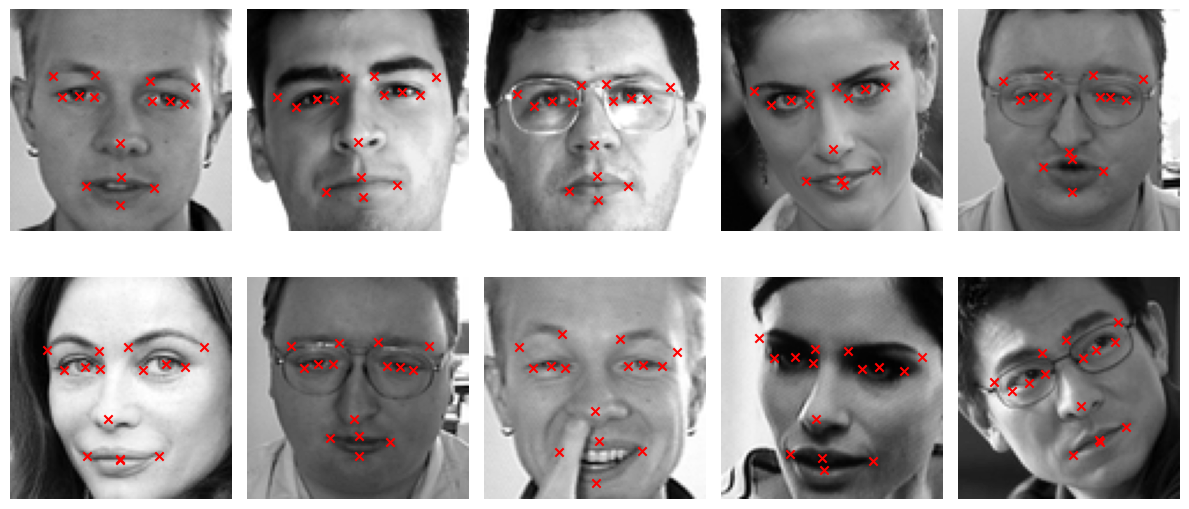

In [2]:
# load the data
data = io.loadmat("./face_landmark.mat")
images = data["images"]
landmarks = data["landmarks"]
print("im_shape:", images.shape)
print("landmarks_shape:", landmarks.shape)

# visualize a random data

np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(images))
    img = images[index]
    keypoints = landmarks[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
images.shape

(2140, 96, 96)

In [4]:
landmarks.shape  # image 당15개의 landmark

(2140, 15, 2)

In [5]:
mean = np.mean(images)
mean

121.06315

In [6]:
std = np.std(images)
std

59.070286

In [7]:
def flip_along_y(points):
    points[:, 0] = 95 - points[:, 0]
    return points

def normalize_data(image) :
    image = TF.normalize(image, mean, std)
    
    return image

def flip_data(image, landmark) :
    image = TF.to_tensor(self.images[index]).clone()
    image = TF.normalize(image, mean, std)
    landmark = torch.tensor(self.landmarks[index])
        
    # random flip
    r = random.random()  # 0 ~ 1
    if r >  0.5:  # flip
        image = TF.hflip(image)
        self.flip_along_y(landmark)
    
    return image, landmark    

def data_to_tensor(data) :
    return torch.tensor(data)

In [47]:
def l1_loss(y_true, y_pred) :
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def l2_loss(y_true, y_pred) :
    return tf.reduce_mean(tf.square(y_true - y_pred))

def cosine_loss(y_true, y_pred):
    y_true = tf.nn.l2_normalize(y_true, axis=-1)
    y_pred = tf.nn.l2_normalize(y_pred, axis=-1)
    return tf.reduce_mean(1 - tf.reduce_sum(y_true * y_pred, axis=-1))

def custom_loss(y_true, y_pred) :
    return l2_loss(y_true, y_pred) + 2*cosine_loss(y_true, y_pred)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(images, landmarks, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1284, 96, 96)
Validation set shape: (428, 96, 96)
Testing set shape: (428, 96, 96)


In [57]:
X_train, X_val, X_test = normalize_data(data_to_tensor(X_train)), normalize_data(data_to_tensor(X_val)), normalize_data(data_to_tensor(X_test))
#y_train, y_val, y_test = normalize_data(data_to_tensor(y_train)), normalize_data(data_to_tensor(y_val)), normalize_data(data_to_tensor(y_test))

In [58]:
X_train = tf.convert_to_tensor(X_train.numpy(), dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val.numpy(), dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.numpy(), dtype=tf.float32)

y_train = tf.convert_to_tensor(y_train.numpy(), dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val.numpy(), dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.numpy(), dtype=tf.float32)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [60]:
y_train = y_train.reshape(y_train.shape[0], 30, 1)
y_val = y_val.reshape(y_val.shape[0], 30, 1)
y_test = y_test.reshape(y_test.shape[0], 30, 1)

In [26]:
y_train[0]

array([[70.32252 ],
       [39.389553],
       [33.771015],
       [33.437843],
       [58.755585],
       [39.032032],
       [76.842064],
       [40.94583 ],
       [39.11283 ],
       [36.84483 ],
       [25.968592],
       [31.25064 ],
       [57.95531 ],
       [28.713663],
       [79.84504 ],
       [30.759184],
       [39.120583],
       [27.093185],
       [23.872154],
       [25.472708],
       [35.617573],
       [66.743965],
       [60.13255 ],
       [90.77966 ],
       [34.826427],
       [82.56161 ],
       [43.644966],
       [85.70128 ],
       [43.987415],
       [90.53295 ]], dtype=float32)

In [89]:
y_train.shape

(1284, 30, 1)

In [86]:
y_train = np.reshape(y_train, (y_train.shape[0], 15, 2))
y_train[0]

array([[-0.8589874 , -1.3826512 ],
       [-1.4777672 , -1.4834075 ],
       [-1.0548038 , -1.3887035 ],
       [-0.74861807, -1.3563049 ],
       [-1.3873358 , -1.4257307 ],
       [-1.6098543 , -1.5204346 ],
       [-1.0683516 , -1.5633831 ],
       [-0.6977808 , -1.5287545 ],
       [-1.3872045 , -1.5908161 ],
       [-1.645345  , -1.6182492 ],
       [-1.4465069 , -0.91956866],
       [-1.0314932 , -0.51266867],
       [-1.4599003 , -0.65179205],
       [-1.3106112 , -0.59864056],
       [-1.3048139 , -0.5168453 ]], dtype=float32)

# Model_l1 loss

In [61]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=l1_loss)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, mode = 'auto', patience = 10)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/100
41/41 [==============================] - 5s 115ms/step - loss: 20.9915 - val_loss: 17.6294
Epoch 2/100
41/41 [==============================] - 5s 110ms/step - loss: 17.7384 - val_loss: 18.2631
Epoch 3/100
41/41 [==============================] - 4s 107ms/step - loss: 17.7507 - val_loss: 16.8866
Epoch 4/100
41/41 [==============================] - 4s 105ms/step - loss: 17.0827 - val_loss: 18.1628
Epoch 5/100
41/41 [==============================] - 4s 107ms/step - loss: 17.1494 - val_loss: 16.8444
Epoch 6/100
41/41 [==============================] - 4s 109ms/step - loss: 16.9077 - val_loss: 16.1345
Epoch 7/100
41/41 [==============================] - 4s 110ms/step - loss: 16.3869 - val_loss: 16.2946
Epoch 8/100
41/41 [==============================] - 5s 112ms/step - loss: 16.0341 - val_loss: 16.0761
Epoch 9/100
41/41 [==============================] - 4s 110ms/step - loss: 15.9069 - val_loss: 15.9731
Epoch 10/100
41/41 [==============================] - 4s 108ms/step - los

In [64]:
predictions = model.predict(X_val)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[69.03543 , 38.524612, 28.850685, ..., 74.581955,  0.      ,
         0.      ],
       [62.33333 , 35.496002, 27.628685, ..., 76.431946,  0.      ,
         0.      ],
       [58.80606 , 32.395077, 25.093462, ..., 63.133373,  0.      ,
         0.      ],
       ...,
       [63.010704, 39.08537 , 27.316097, ..., 71.236855,  0.      ,
         0.      ],
       [60.959576, 36.57984 , 30.004284, ..., 70.87099 ,  0.      ,
         0.      ],
       [68.20122 , 38.911278, 34.55711 , ..., 75.831985,  0.      ,
         0.      ]], dtype=float32)

In [65]:
l1_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=27.793535>

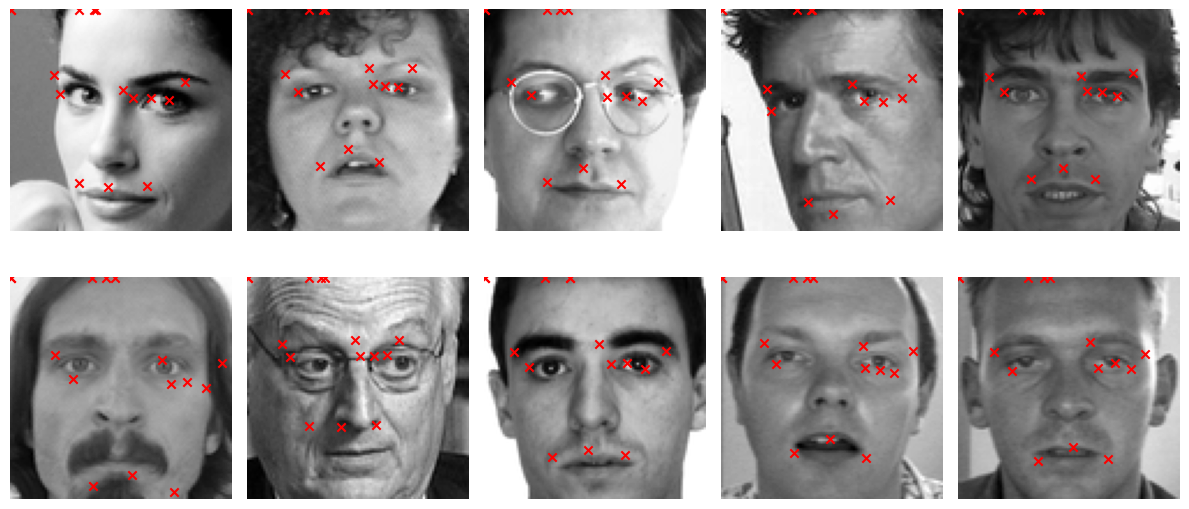

In [63]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [102]:
predictions = model.predict(X_test)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 19ms/step


array([[[ 0.      ,  0.      ],
        [32.55644 , 38.692856],
        [60.544247,  0.      ],
        ...,
        [ 0.      ,  0.      ],
        [48.94012 , 76.039665],
        [52.61996 , 87.171394]],

       [[ 0.      ,  0.      ],
        [42.57979 , 41.81806 ],
        [72.19646 ,  0.      ],
        ...,
        [ 0.      ,  0.      ],
        [57.168724, 95.35715 ],
        [60.09712 , 94.374016]],

       [[ 0.      ,  0.      ],
        [34.557858, 40.762352],
        [66.62352 ,  0.      ],
        ...,
        [ 0.      ,  0.      ],
        [53.758156, 82.62157 ],
        [58.569195, 92.010635]],

       ...,

       [[ 0.      ,  0.      ],
        [32.244102, 37.676228],
        [61.009933,  0.      ],
        ...,
        [ 0.      ,  0.      ],
        [47.938267, 68.44884 ],
        [51.4162  , 82.39838 ]],

       [[ 0.      ,  0.      ],
        [25.835896, 33.027233],
        [52.3212  ,  0.      ],
        ...,
        [ 0.      ,  0.      ],
        [40.981712

In [101]:
l1_loss(y_test, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=28.928493>

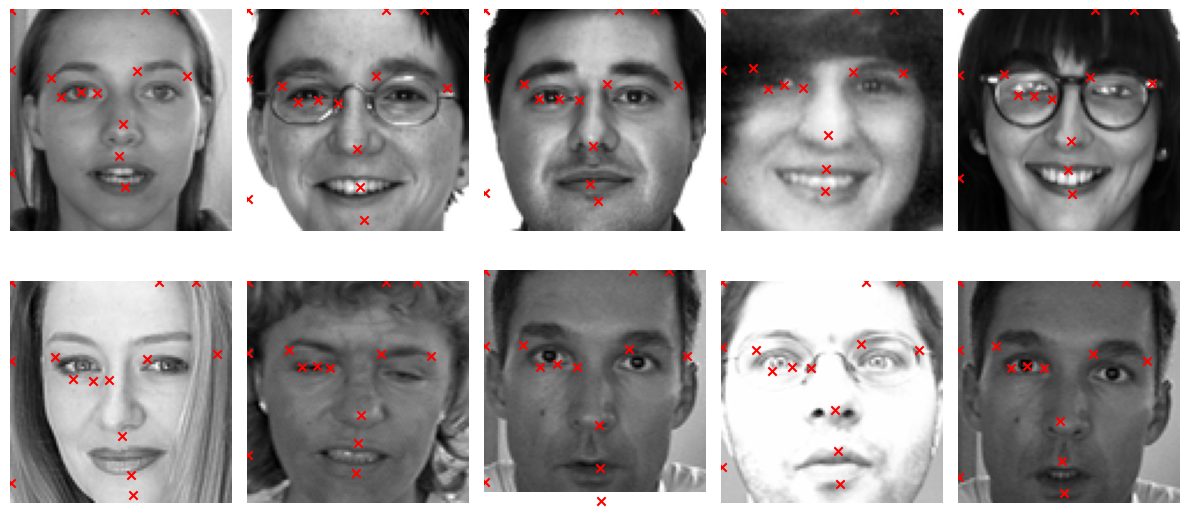

In [104]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model_l2 loss

In [66]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=l2_loss)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, mode = 'auto', patience = 10)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks = [early_stopping])


Epoch 1/100
41/41 [==============================] - 5s 112ms/step - loss: 1489.4236 - val_loss: 1317.4067
Epoch 2/100
41/41 [==============================] - 4s 108ms/step - loss: 1296.8488 - val_loss: 1273.2953
Epoch 3/100
41/41 [==============================] - 4s 108ms/step - loss: 1281.2643 - val_loss: 1275.5396
Epoch 4/100
41/41 [==============================] - 4s 108ms/step - loss: 1275.8915 - val_loss: 1265.0640
Epoch 5/100
41/41 [==============================] - 4s 108ms/step - loss: 1270.0795 - val_loss: 1288.2406
Epoch 6/100
41/41 [==============================] - 5s 110ms/step - loss: 1270.1282 - val_loss: 1299.5533
Epoch 7/100
41/41 [==============================] - 5s 112ms/step - loss: 1274.8737 - val_loss: 1258.1163
Epoch 8/100
41/41 [==============================] - 4s 104ms/step - loss: 1259.5079 - val_loss: 1268.7107
Epoch 9/100
41/41 [==============================] - 4s 103ms/step - loss: 1257.3964 - val_loss: 1252.0154
Epoch 10/100
41/41 [=================

Epoch 77/100
41/41 [==============================] - 4s 107ms/step - loss: 1026.5421 - val_loss: 1040.0106
Epoch 78/100
41/41 [==============================] - 4s 109ms/step - loss: 1025.1835 - val_loss: 1045.1370
Epoch 79/100
41/41 [==============================] - 4s 106ms/step - loss: 1025.3453 - val_loss: 1038.3477
Epoch 80/100
41/41 [==============================] - 4s 108ms/step - loss: 1024.0137 - val_loss: 1037.9923
Epoch 81/100
41/41 [==============================] - 4s 105ms/step - loss: 1023.6201 - val_loss: 1037.6874
Epoch 82/100
41/41 [==============================] - 4s 104ms/step - loss: 1023.2842 - val_loss: 1037.3632
Epoch 83/100
41/41 [==============================] - 4s 108ms/step - loss: 1023.4441 - val_loss: 1037.9851
Epoch 84/100
41/41 [==============================] - 4s 105ms/step - loss: 1023.4270 - val_loss: 1037.8854
Epoch 85/100
41/41 [==============================] - 4s 106ms/step - loss: 1023.5526 - val_loss: 1043.6389
Epoch 86/100
41/41 [========

In [69]:
predictions = model.predict(X_val)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions
l1_loss(y_val, np.expand_dims(predictions, axis = 1))

14/14 [==============================] - 0s 20ms/step


array([[[69.98826 , 37.323696],
        [30.411346, 37.720196],
        [ 0.      , 38.34624 ],
        ...,
        [33.76793 , 76.35644 ],
        [ 0.      , 74.62765 ],
        [50.29135 ,  0.      ]],

       [[64.45677 , 39.831097],
        [28.63397 , 42.362473],
        [ 0.      , 41.793697],
        ...,
        [34.70796 , 83.54032 ],
        [ 0.      , 79.78853 ],
        [50.958656,  0.      ]],

       [[61.059475, 32.359253],
        [26.719273, 33.747673],
        [ 0.      , 34.09287 ],
        ...,
        [29.481901, 69.48482 ],
        [ 0.      , 68.04055 ],
        [43.59299 ,  0.      ]],

       ...,

       [[63.32082 , 38.01709 ],
        [28.526312, 36.713665],
        [ 0.      , 38.518253],
        ...,
        [27.48079 , 71.57936 ],
        [ 0.      , 73.34464 ],
        [43.279903,  0.      ]],

       [[59.242973, 31.776026],
        [26.470747, 30.905134],
        [ 0.      , 33.190056],
        ...,
        [26.302786, 64.24469 ],
        [ 0.      

In [68]:
l1_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=29.546616>

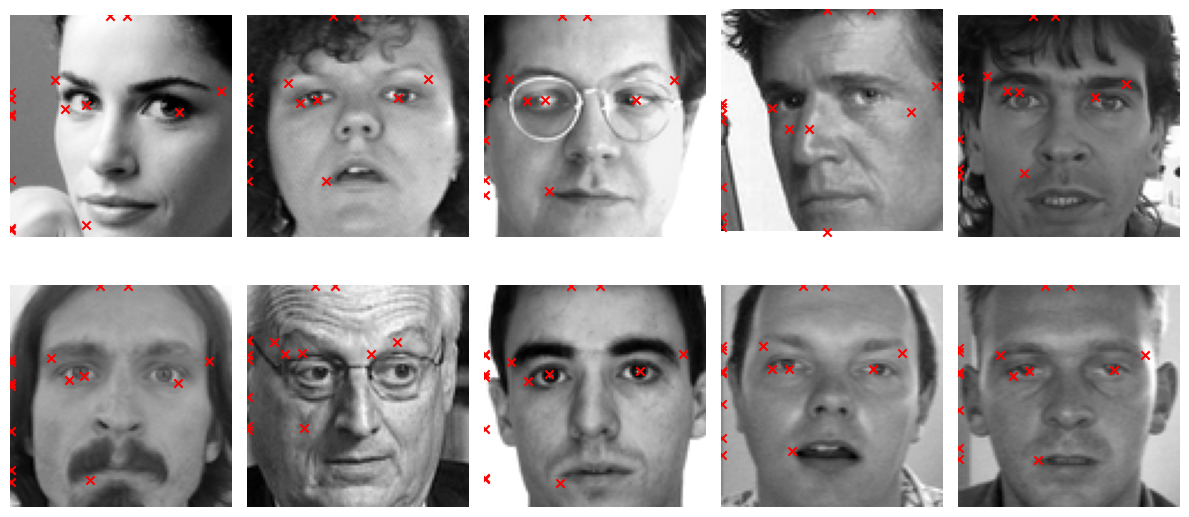

In [70]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [108]:
predictions = model.predict(X_test)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 20ms/step


array([[ 64.60131 ,  34.265263,  26.463058, ...,  70.35137 ,  45.40728 ,
         81.0493  ],
       [ 82.64882 ,  45.767597,  38.080982, ...,  97.87805 ,  59.20152 ,
        101.99686 ],
       [ 69.37473 ,  36.34016 ,  31.543505, ...,  77.76281 ,  54.23631 ,
         85.26625 ],
       ...,
       [ 56.75332 ,  32.52434 ,  25.45626 , ...,  60.01209 ,  41.445553,
         70.25317 ],
       [ 58.10076 ,  34.356236,  27.72203 , ...,  61.21329 ,  41.97403 ,
         75.39969 ],
       [ 59.906555,  33.83725 ,  28.000086, ...,  65.66714 ,  46.726967,
         76.932205]], dtype=float32)

In [109]:
l2_loss(y_test, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=914.21857>

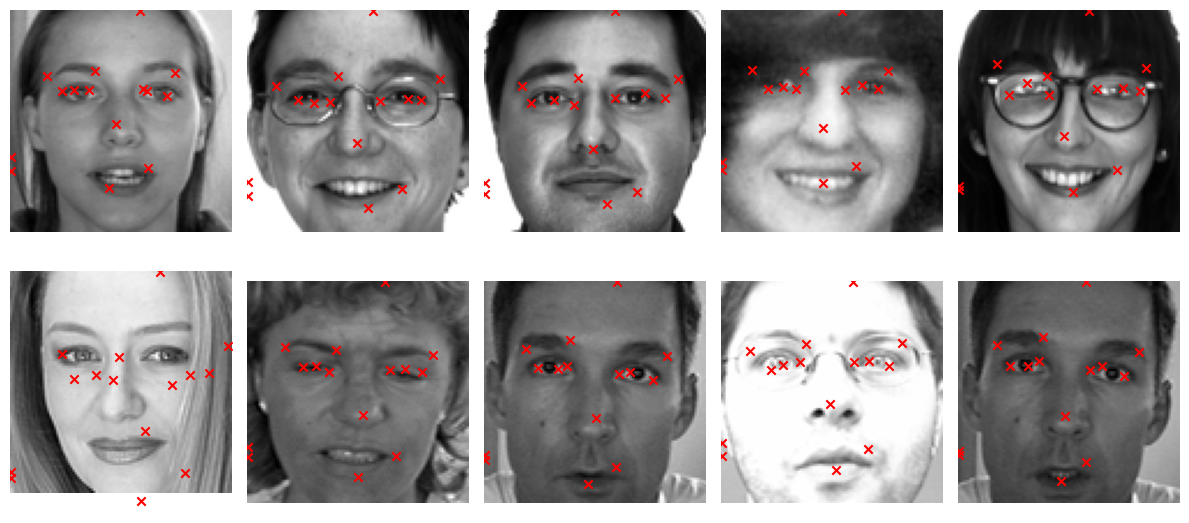

In [107]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model_cosine loss

In [71]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=cosine_loss)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, mode = 'min', patience = 10)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks = [early_stopping])

predictions = model.predict(X_test)

Epoch 1/100
41/41 [==============================] - 5s 110ms/step - loss: 0.1714 - val_loss: 0.1319
Epoch 2/100
41/41 [==============================] - 4s 104ms/step - loss: 0.1318 - val_loss: 0.1315
Epoch 3/100
41/41 [==============================] - 4s 104ms/step - loss: 0.1316 - val_loss: 0.1314
Epoch 4/100
41/41 [==============================] - 4s 104ms/step - loss: 0.1315 - val_loss: 0.1314
Epoch 5/100
41/41 [==============================] - 4s 105ms/step - loss: 0.1315 - val_loss: 0.1314
Epoch 6/100
41/41 [==============================] - 4s 105ms/step - loss: 0.1315 - val_loss: 0.1314
Epoch 7/100
41/41 [==============================] - 4s 106ms/step - loss: 0.1315 - val_loss: 0.1313
Epoch 8/100
41/41 [==============================] - 4s 104ms/step - loss: 0.1314 - val_loss: 0.1313
Epoch 9/100
41/41 [==============================] - 4s 104ms/step - loss: 0.1314 - val_loss: 0.1313
Epoch 10/100
41/41 [==============================] - 4s 106ms/step - loss: 0.1313 - val_lo

41/41 [==============================] - 4s 110ms/step - loss: 0.0822 - val_loss: 0.0823
Epoch 82/100
41/41 [==============================] - 4s 107ms/step - loss: 0.0822 - val_loss: 0.0823
Epoch 83/100
41/41 [==============================] - 4s 107ms/step - loss: 0.0822 - val_loss: 0.0823
Epoch 84/100
41/41 [==============================] - 4s 107ms/step - loss: 0.0822 - val_loss: 0.0823
Epoch 85/100
41/41 [==============================] - 4s 109ms/step - loss: 0.0821 - val_loss: 0.0823
Epoch 86/100
41/41 [==============================] - 4s 104ms/step - loss: 0.0821 - val_loss: 0.0823
Epoch 87/100
41/41 [==============================] - 4s 105ms/step - loss: 0.0821 - val_loss: 0.0823
Epoch 88/100
41/41 [==============================] - 4s 107ms/step - loss: 0.0821 - val_loss: 0.0823
Epoch 89/100
41/41 [==============================] - 4s 106ms/step - loss: 0.0821 - val_loss: 0.0823
Epoch 90/100
14/14 [==============================] - 0s 21ms/step


In [74]:
predictions = model.predict(X_val)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions


14/14 [==============================] - 0s 20ms/step


array([[  0.      ,  80.395004,   0.      , ..., 160.93741 , 117.843575,
        197.29008 ],
       [  0.      , 158.48836 ,   0.      , ..., 322.60815 , 206.82169 ,
        367.1499  ],
       [  0.      , 110.28247 ,   0.      , ..., 208.62254 , 144.58849 ,
        240.58897 ],
       ...,
       [  0.      , 145.99019 ,   0.      , ..., 268.1233  , 167.15195 ,
        321.3013  ],
       [  0.      , 137.63    ,   0.      , ..., 277.1265  , 157.33305 ,
        307.2979  ],
       [  0.      , 146.6339  ,   0.      , ..., 296.35498 , 214.07521 ,
        338.17795 ]], dtype=float32)

In [75]:
l1_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=100.084526>

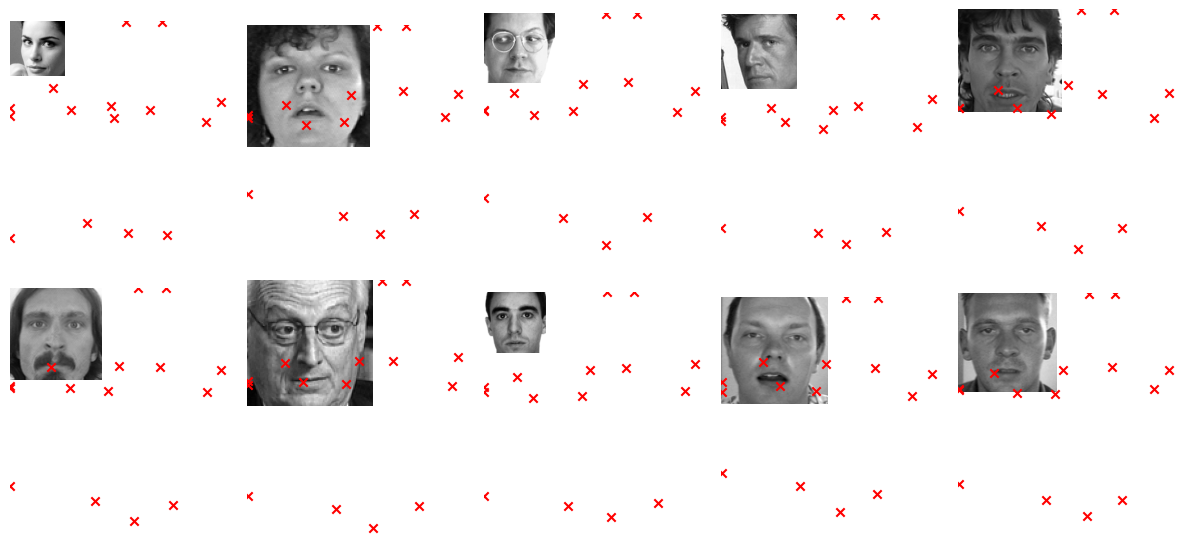

In [73]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [53]:
predictions = model.predict(X_test)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[[1.4284796 , 0.82459474],
        [0.6517801 , 0.7704435 ],
        [1.2315692 , 0.84566224],
        ...,
        [0.59790653, 1.5464455 ],
        [1.0606419 , 1.5788691 ],
        [1.0222955 , 1.7664672 ]],

       [[1.4623733 , 0.8362515 ],
        [0.72098327, 0.6544706 ],
        [1.2671838 , 0.80702883],
        ...,
        [0.62029666, 1.4516497 ],
        [0.92902917, 1.5650615 ],
        [0.88374317, 1.6772102 ]],

       [[1.3763926 , 0.75175095],
        [0.59858036, 0.7715699 ],
        [1.2461746 , 0.7960552 ],
        ...,
        [0.65266246, 1.5803113 ],
        [0.99897975, 1.5171437 ],
        [0.9777668 , 1.7139994 ]],

       ...,

       [[1.2678676 , 0.71357924],
        [0.5866981 , 0.68800056],
        [1.1941594 , 0.7295507 ],
        ...,
        [0.6844141 , 1.459416  ],
        [0.9370989 , 1.3245662 ],
        [0.94558835, 1.5973965 ]],

       [[1.2669078 , 0.68836206],
        [0.5475082 , 0.7151732 ],
        [1.1435348 , 0.7478979 ],
        .

In [22]:
cosine_loss(y_test, np.expand_dims(predictions, axis = 1))

InvalidArgumentError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [428,30,1] vs. [428,1,15,2] [Op:Mul]

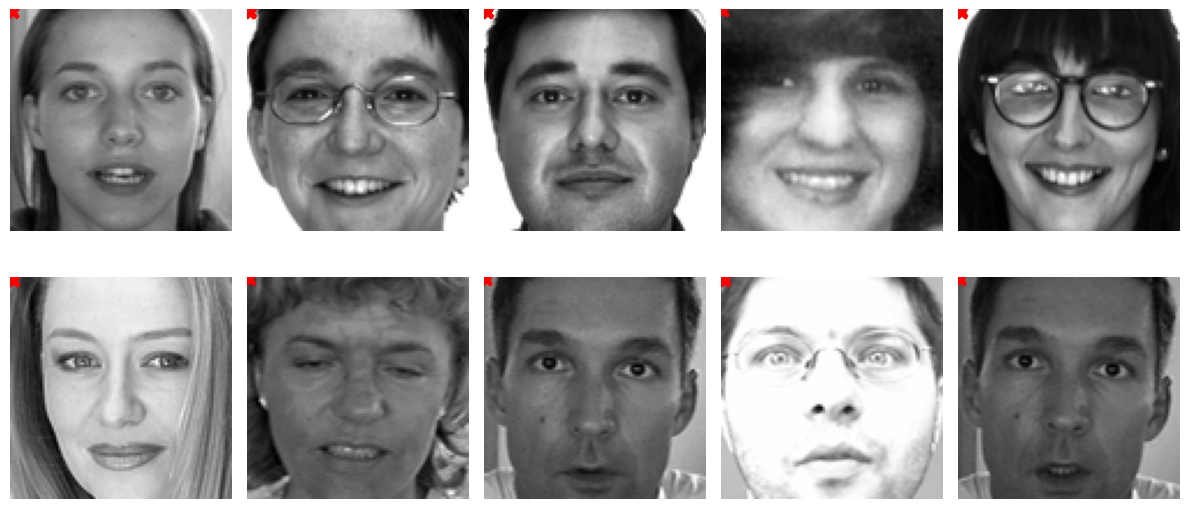

In [54]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model_custom loss

In [76]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=custom_loss)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))



Epoch 1/100
41/41 [==============================] - 5s 111ms/step - loss: 964.5571 - val_loss: 729.9807
Epoch 2/100
41/41 [==============================] - 4s 107ms/step - loss: 712.9603 - val_loss: 687.7177
Epoch 3/100
41/41 [==============================] - 4s 107ms/step - loss: 694.1576 - val_loss: 698.7701
Epoch 4/100
41/41 [==============================] - 4s 108ms/step - loss: 693.1025 - val_loss: 722.4078
Epoch 5/100
41/41 [==============================] - 4s 109ms/step - loss: 703.7258 - val_loss: 677.2202
Epoch 6/100
41/41 [==============================] - 4s 108ms/step - loss: 677.6715 - val_loss: 678.9857
Epoch 7/100
41/41 [==============================] - 4s 109ms/step - loss: 670.2133 - val_loss: 671.4616
Epoch 8/100
41/41 [==============================] - 4s 109ms/step - loss: 664.4095 - val_loss: 668.7137
Epoch 9/100
41/41 [==============================] - 4s 103ms/step - loss: 659.1992 - val_loss: 657.1960
Epoch 10/100
41/41 [==============================] - 4

41/41 [==============================] - 4s 106ms/step - loss: 467.6157 - val_loss: 493.5313
Epoch 79/100
41/41 [==============================] - 4s 106ms/step - loss: 467.8457 - val_loss: 501.5630
Epoch 80/100
41/41 [==============================] - 4s 106ms/step - loss: 476.1838 - val_loss: 502.4993
Epoch 81/100
41/41 [==============================] - 4s 106ms/step - loss: 472.3582 - val_loss: 495.0998
Epoch 82/100
41/41 [==============================] - 4s 106ms/step - loss: 469.8112 - val_loss: 497.5183
Epoch 83/100
41/41 [==============================] - 4s 105ms/step - loss: 469.3002 - val_loss: 494.6480
Epoch 84/100
41/41 [==============================] - 4s 109ms/step - loss: 468.3784 - val_loss: 493.3540
Epoch 85/100
41/41 [==============================] - 5s 116ms/step - loss: 467.7919 - val_loss: 492.9736
Epoch 86/100
41/41 [==============================] - 4s 108ms/step - loss: 468.0073 - val_loss: 500.8172
Epoch 87/100
41/41 [==============================] - 4s 10

In [79]:
predictions = model.predict(X_val)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[[ 0.      , 36.078403],
        [27.618345, 33.041904],
        [58.798748, 35.47135 ],
        ...,
        [30.135609, 70.64874 ],
        [44.233173, 68.261665],
        [46.735817, 79.76406 ]],

       [[ 0.      , 39.841515],
        [32.807518, 42.313046],
        [60.456757, 42.887276],
        ...,
        [34.28943 , 86.292435],
        [49.607983, 79.79389 ],
        [51.233253, 87.63905 ]],

       [[ 0.      , 39.27327 ],
        [29.358097, 38.22131 ],
        [62.13932 , 38.370308],
        ...,
        [30.671658, 76.36723 ],
        [50.014397, 78.1288  ],
        [50.470173, 85.01621 ]],

       ...,

       [[ 0.      , 42.434544],
        [30.580893, 39.802406],
        [58.326492, 42.741203],
        ...,
        [25.073286, 75.0559  ],
        [45.996616, 73.25754 ],
        [46.0061  , 87.05629 ]],

       [[ 0.      , 40.313625],
        [30.411564, 35.683666],
        [62.225643, 39.07681 ],
        ...,
        [26.691298, 77.56513 ],
        [47.224022

In [78]:
l1_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=25.243225>

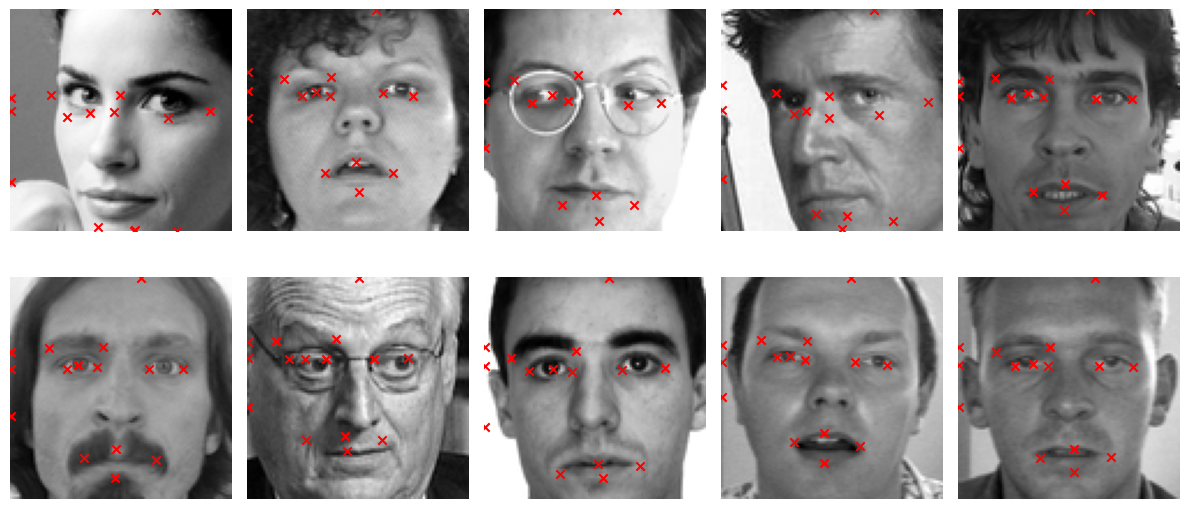

In [80]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [126]:
predictions = model.predict(X_test)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[ 64.58836 ,  35.670124,  31.484276, ...,  71.77586 ,  48.52928 ,
         80.55622 ],
       [ 80.30758 ,  46.02012 ,  40.423927, ...,  92.19756 ,  56.999756,
        102.50223 ],
       [ 59.548004,  32.26326 ,  26.69178 , ...,  65.95906 ,  42.57527 ,
         74.16235 ],
       ...,
       [ 63.867264,  36.067165,  30.857828, ...,  65.92239 ,  47.212513,
         80.29772 ],
       [ 58.367752,  33.214577,  27.675512, ...,  59.600525,  44.01695 ,
         75.62144 ],
       [ 61.26486 ,  34.408302,  25.973803, ...,  65.50179 ,  46.331516,
         79.03733 ]], dtype=float32)

In [127]:
custom_loss(y_test, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=890.46295>

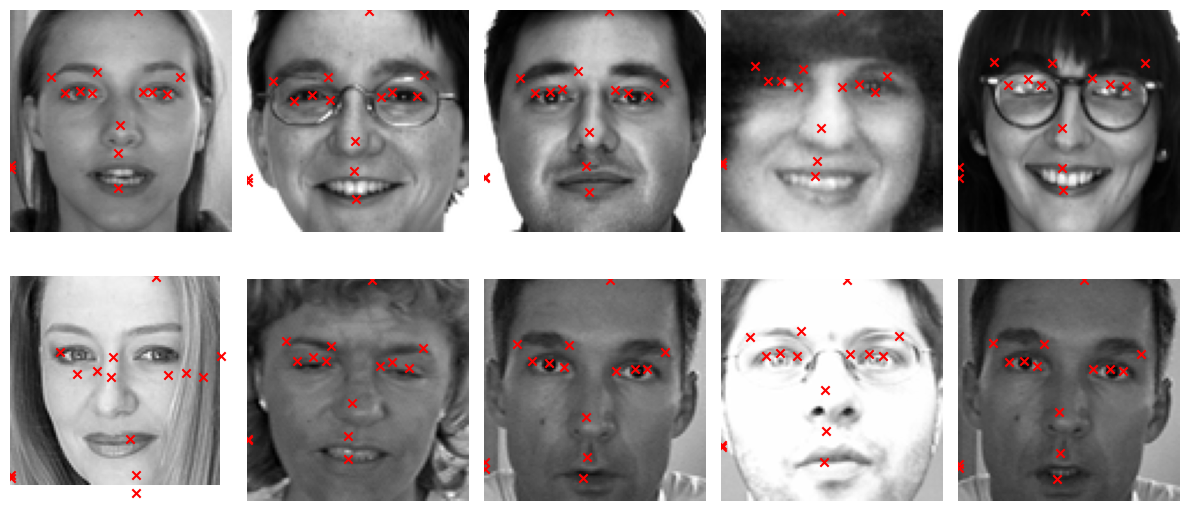

In [125]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Model_Regularize

In [93]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1), kernel_regularizer=regularizers.l2(0.1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu', kernel_regularizer=regularizers.l2(0.1)))

model.compile(optimizer='adam', loss=custom_loss)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))



Epoch 1/100
41/41 [==============================] - 5s 120ms/step - loss: 895.2765 - val_loss: 515.6656
Epoch 2/100
41/41 [==============================] - 4s 105ms/step - loss: 458.3028 - val_loss: 421.6768
Epoch 3/100
41/41 [==============================] - 4s 107ms/step - loss: 427.1071 - val_loss: 406.4911
Epoch 4/100
41/41 [==============================] - 4s 105ms/step - loss: 412.7858 - val_loss: 411.5965
Epoch 5/100
41/41 [==============================] - 4s 104ms/step - loss: 412.4973 - val_loss: 454.7576
Epoch 6/100
41/41 [==============================] - 4s 106ms/step - loss: 407.9702 - val_loss: 396.0442
Epoch 7/100
41/41 [==============================] - 4s 104ms/step - loss: 394.4743 - val_loss: 392.9228
Epoch 8/100
41/41 [==============================] - 4s 106ms/step - loss: 393.0941 - val_loss: 403.3396
Epoch 9/100
41/41 [==============================] - 4s 107ms/step - loss: 397.3599 - val_loss: 379.2008
Epoch 10/100
41/41 [==============================] - 4

41/41 [==============================] - 4s 108ms/step - loss: 16.7489 - val_loss: 54.1874
Epoch 80/100
41/41 [==============================] - 4s 106ms/step - loss: 16.5268 - val_loss: 49.5406
Epoch 81/100
41/41 [==============================] - 4s 108ms/step - loss: 15.7330 - val_loss: 52.3188
Epoch 82/100
41/41 [==============================] - 4s 108ms/step - loss: 16.5676 - val_loss: 54.7556
Epoch 83/100
41/41 [==============================] - 4s 110ms/step - loss: 18.7344 - val_loss: 45.0180
Epoch 84/100
41/41 [==============================] - 4s 109ms/step - loss: 15.5087 - val_loss: 44.0047
Epoch 85/100
41/41 [==============================] - 4s 106ms/step - loss: 14.2966 - val_loss: 52.9694
Epoch 86/100
41/41 [==============================] - 4s 108ms/step - loss: 13.5852 - val_loss: 43.7859
Epoch 87/100
41/41 [==============================] - 5s 110ms/step - loss: 12.9387 - val_loss: 45.4336
Epoch 88/100
41/41 [==============================] - 4s 107ms/step - loss: 1

In [96]:
predictions = model.predict(X_val)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 20ms/step


array([[[68.02063 , 36.806496],
        [27.956226, 36.992493],
        [60.802948, 37.743412],
        ...,
        [32.455708, 75.93715 ],
        [46.999428, 72.144646],
        [46.14916 , 85.54785 ]],

       [[63.035416, 34.767307],
        [26.323956, 37.435413],
        [55.30011 , 35.666985],
        ...,
        [31.822056, 78.300415],
        [47.089046, 72.71813 ],
        [47.18996 , 80.65054 ]],

       [[59.954655, 34.004784],
        [26.680733, 32.9938  ],
        [53.2676  , 33.76312 ],
        ...,
        [26.575022, 65.07569 ],
        [43.11402 , 63.44402 ],
        [41.797794, 73.6307  ]],

       ...,

       [[68.25139 , 39.7044  ],
        [27.547398, 38.750813],
        [60.497623, 40.794067],
        ...,
        [27.531296, 77.23675 ],
        [46.227055, 74.58347 ],
        [45.819553, 85.89267 ]],

       [[65.683754, 37.741318],
        [27.960773, 35.124866],
        [58.248264, 38.07192 ],
        ...,
        [28.363129, 74.4098  ],
        [45.353275

In [95]:
custom_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=732.98584>

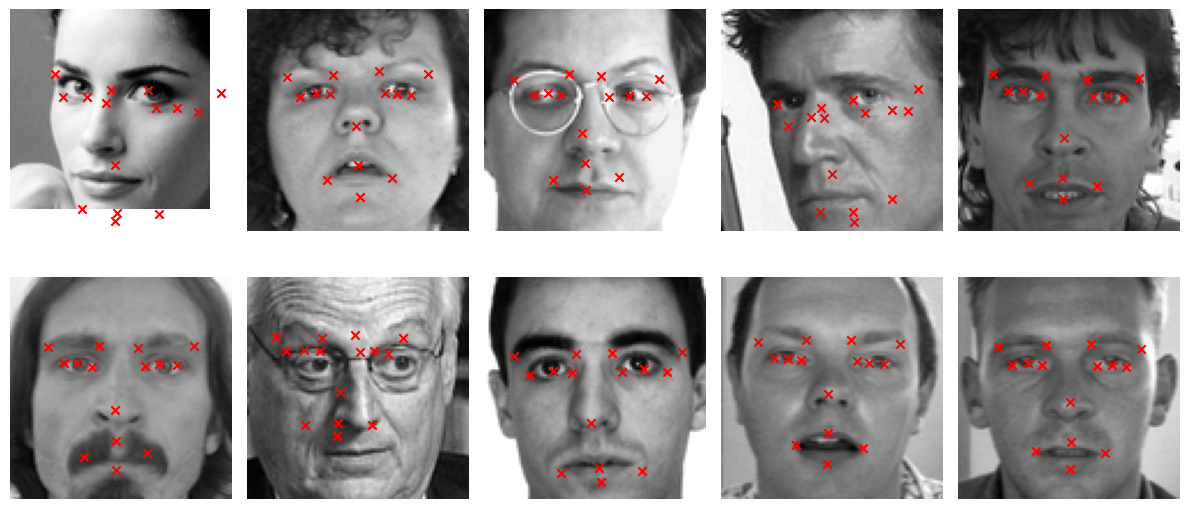

In [97]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [138]:
predictions = model.predict(X_test)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 20ms/step


array([[[ 64.01933 ,  33.10768 ],
        [ 27.623913,  34.16417 ],
        [ 57.386208,  36.236595],
        ...,
        [ 27.26563 ,  68.61787 ],
        [ 46.103477,  68.362236],
        [ 46.793816,  77.51816 ]],

       [[ 83.90024 ,  47.264984],
        [ 40.11511 ,  43.62855 ],
        [ 75.52053 ,  49.75517 ],
        ...,
        [ 39.99621 ,  97.45832 ],
        [ 56.952457,  98.64127 ],
        [ 55.362   , 105.00006 ]],

       [[ 64.906136,  34.759163],
        [ 29.68257 ,  35.813824],
        [ 58.71702 ,  37.842293],
        ...,
        [ 32.198296,  74.53111 ],
        [ 48.36119 ,  73.048996],
        [ 49.76807 ,  80.11293 ]],

       ...,

       [[ 67.15543 ,  35.537582],
        [ 30.856459,  36.106113],
        [ 61.10866 ,  36.377758],
        ...,
        [ 35.510864,  73.50297 ],
        [ 49.41829 ,  68.61778 ],
        [ 49.51894 ,  83.10106 ]],

       [[ 60.815334,  32.60128 ],
        [ 26.2935  ,  33.760677],
        [ 53.350357,  36.847485],
        .

In [137]:
custom_loss(y_test, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=736.12787>

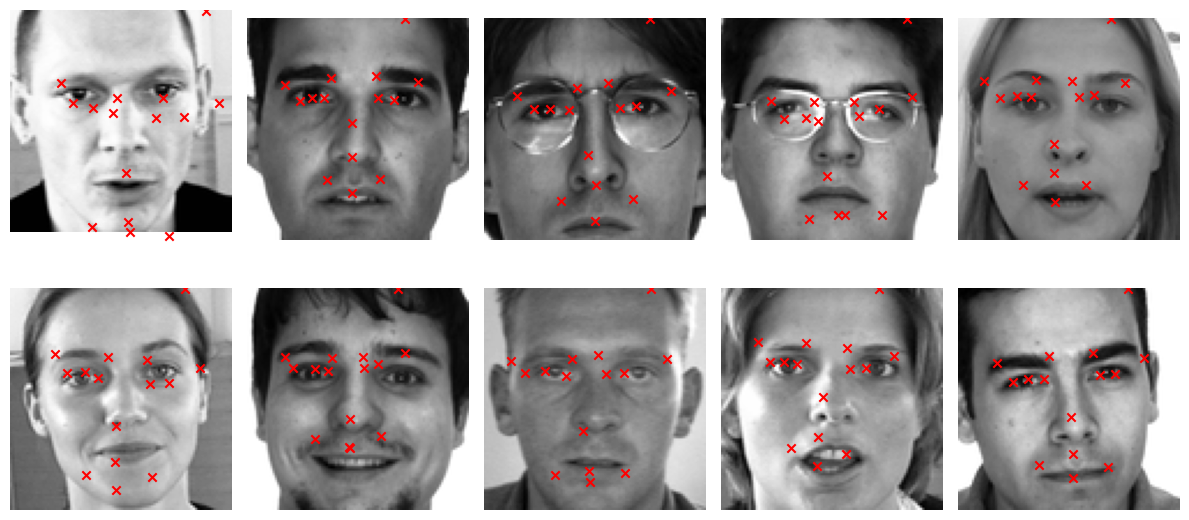

In [91]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

# dropout

In [98]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=custom_loss)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))



Epoch 1/100
41/41 [==============================] - 6s 122ms/step - loss: 844.7616 - val_loss: 2284.6582
Epoch 2/100
41/41 [==============================] - 5s 117ms/step - loss: 677.8131 - val_loss: 2103.8018
Epoch 3/100
41/41 [==============================] - 5s 126ms/step - loss: 648.0886 - val_loss: 1855.6000
Epoch 4/100
41/41 [==============================] - 5s 122ms/step - loss: 638.4611 - val_loss: 1562.8341
Epoch 5/100
41/41 [==============================] - 5s 120ms/step - loss: 639.5089 - val_loss: 1542.6053
Epoch 6/100
41/41 [==============================] - 5s 119ms/step - loss: 642.3295 - val_loss: 1661.2628
Epoch 7/100
41/41 [==============================] - 5s 119ms/step - loss: 621.6670 - val_loss: 1622.4558
Epoch 8/100
41/41 [==============================] - 5s 121ms/step - loss: 612.5373 - val_loss: 1646.5829
Epoch 9/100
41/41 [==============================] - 5s 117ms/step - loss: 615.1669 - val_loss: 1505.1063
Epoch 10/100
41/41 [==========================

41/41 [==============================] - 5s 118ms/step - loss: 539.6306 - val_loss: 552.1273
Epoch 79/100
41/41 [==============================] - 5s 116ms/step - loss: 539.5309 - val_loss: 548.7900
Epoch 80/100
41/41 [==============================] - 5s 119ms/step - loss: 538.9617 - val_loss: 550.0907
Epoch 81/100
41/41 [==============================] - 5s 121ms/step - loss: 538.9651 - val_loss: 542.4429
Epoch 82/100
41/41 [==============================] - 5s 119ms/step - loss: 539.2646 - val_loss: 550.4287
Epoch 83/100
41/41 [==============================] - 5s 117ms/step - loss: 539.0095 - val_loss: 551.0989
Epoch 84/100
41/41 [==============================] - 5s 118ms/step - loss: 539.1160 - val_loss: 550.8183
Epoch 85/100
41/41 [==============================] - 5s 119ms/step - loss: 538.8431 - val_loss: 552.1655
Epoch 86/100
41/41 [==============================] - 5s 119ms/step - loss: 539.2305 - val_loss: 548.7510
Epoch 87/100
41/41 [==============================] - 5s 11

In [102]:
predictions = model.predict(X_val)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[61.150486, 33.445744, 26.363117, ..., 65.24585 , 42.968403,
        75.97252 ],
       [61.14434 , 33.749702, 26.612595, ..., 64.7085  , 43.67338 ,
        76.091286],
       [61.198143, 33.482285, 26.420603, ..., 65.30657 , 43.03374 ,
        76.07351 ],
       ...,
       [61.364777, 33.61058 , 26.526655, ..., 65.39406 , 43.25563 ,
        76.28889 ],
       [60.752655, 33.60565 , 26.379908, ..., 64.015076, 43.614185,
        75.52598 ],
       [60.626266, 33.023453, 27.027592, ..., 65.13787 , 44.514053,
        74.91748 ]], dtype=float32)

In [103]:
custom_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=1068.8967>

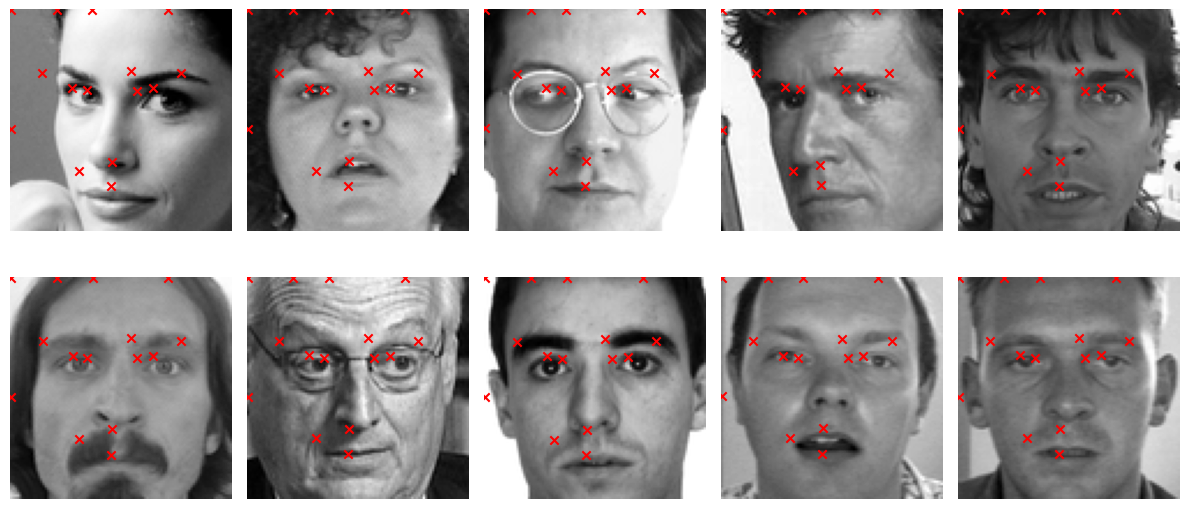

In [101]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [148]:
predictions = model.predict(X_test)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[62.43449 , 34.477104, 27.744514, ..., 68.86109 , 45.595627,
        77.33339 ],
       [63.295666, 34.521366, 27.936584, ..., 70.74583 , 44.997948,
        78.1582  ],
       [60.243423, 33.90523 , 26.984371, ..., 66.397255, 45.49163 ,
        75.19166 ],
       ...,
       [60.947964, 34.13915 , 27.50222 , ..., 67.56271 , 45.31847 ,
        75.6822  ],
       [62.060265, 34.469387, 27.8156  , ..., 69.211105, 44.53434 ,
        76.523796],
       [62.278248, 34.34974 , 27.402185, ..., 68.91113 , 45.11833 ,
        77.03555 ]], dtype=float32)

In [149]:
custom_loss(y_test, np.expand_dims(predictions, axis = 1)) / 428

<tf.Tensor: shape=(), dtype=float32, numpy=2.0492485>

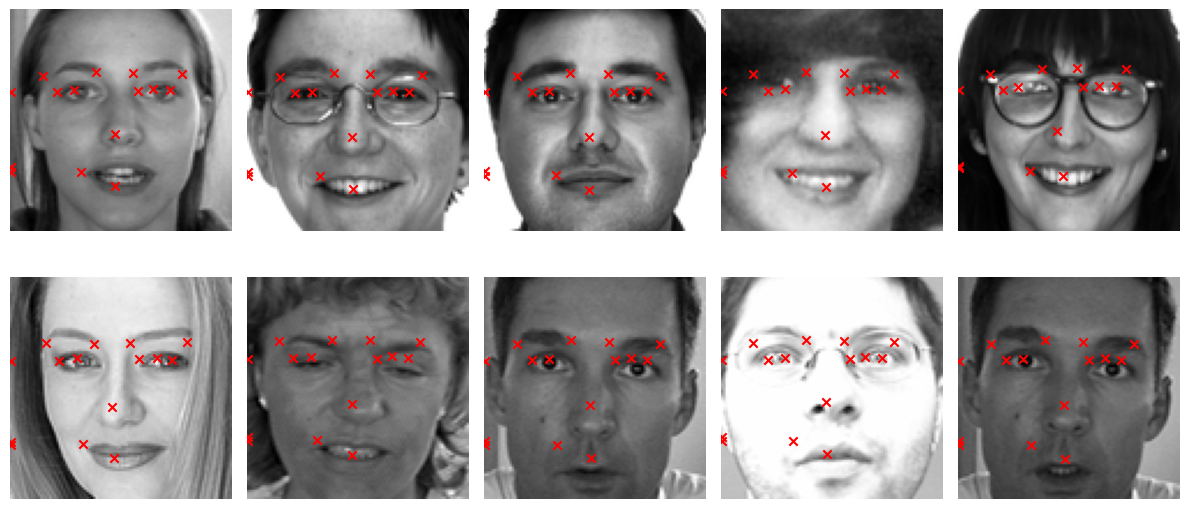

In [146]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

# lamda

In [116]:
def custom_loss(y_true, y_pred) :
    return l2_loss(y_true, y_pred) + 2*cosine_loss(y_true, y_pred)

In [ ]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=custom_loss)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))



Epoch 1/100
41/41 [==============================] - 5s 109ms/step - loss: 1201.4584 - val_loss: 895.8410
Epoch 2/100
41/41 [==============================] - 4s 103ms/step - loss: 905.1299 - val_loss: 929.6537
Epoch 3/100
41/41 [==============================] - 4s 102ms/step - loss: 897.9121 - val_loss: 882.4127
Epoch 4/100
41/41 [==============================] - 4s 101ms/step - loss: 886.5508 - val_loss: 882.3504
Epoch 5/100
30/41 [====================>.........] - ETA: 1s - loss: 883.2584

In [106]:
predictions = model.predict(X_val)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 20ms/step


array([[[62.987675, 35.53483 ],
        [26.559927,  0.      ],
        [57.04717 , 36.11981 ],
        ...,
        [31.570518, 70.174034],
        [43.58391 , 67.00985 ],
        [43.760853, 80.68366 ]],

       [[59.836555, 36.949986],
        [27.571838,  0.      ],
        [53.81556 , 38.598564],
        ...,
        [34.13058 , 76.375496],
        [48.140537, 74.44135 ],
        [46.096344, 82.23955 ]],

       [[58.814407, 31.56995 ],
        [24.657637,  0.      ],
        [52.57494 , 32.377327],
        ...,
        [28.021494, 67.08608 ],
        [42.677605, 64.34577 ],
        [42.644928, 73.069214]],

       ...,

       [[63.217804, 37.08283 ],
        [26.32132 ,  0.      ],
        [58.454453, 38.7699  ],
        ...,
        [23.966566, 72.48869 ],
        [44.602085, 70.541245],
        [43.0156  , 83.449646]],

       [[66.334816, 35.65276 ],
        [25.495743,  0.      ],
        [56.72869 , 36.54586 ],
        ...,
        [28.637848, 76.56595 ],
        [43.39731 

In [ ]:
custom_loss(y_val, np.expand_dims(predictions, axis = 1))

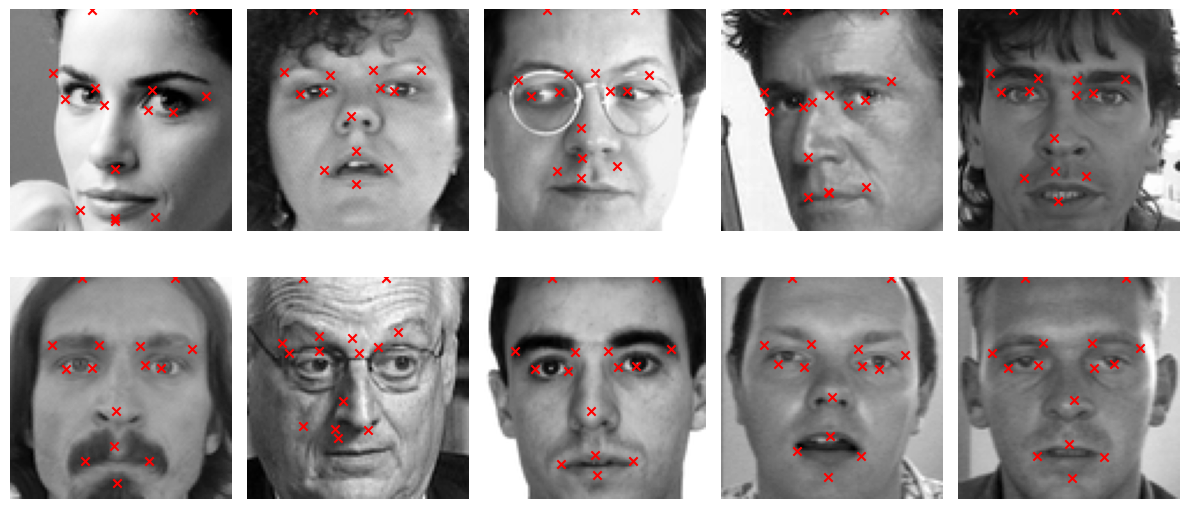

In [107]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [108]:
predictions = model.predict(X_test)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 22ms/step


array([[63.707127, 36.836475, 26.44894 , ..., 70.15086 , 42.782158,
        82.73586 ],
       [60.57756 , 35.158287, 31.628065, ..., 73.080414, 41.811356,
        72.40422 ],
       [62.482327, 33.769146, 26.901482, ..., 73.12591 , 47.262672,
        79.289955],
       ...,
       [63.61734 , 34.924725, 30.20639 , ..., 65.983765, 48.787308,
        82.534744],
       [51.38343 , 30.244598, 19.840334, ..., 57.147137, 36.65627 ,
        67.83204 ],
       [64.59739 , 37.997154, 28.56726 , ..., 69.16392 , 49.059296,
        82.14952 ]], dtype=float32)

In [109]:
custom_loss(y_test, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=840.67566>

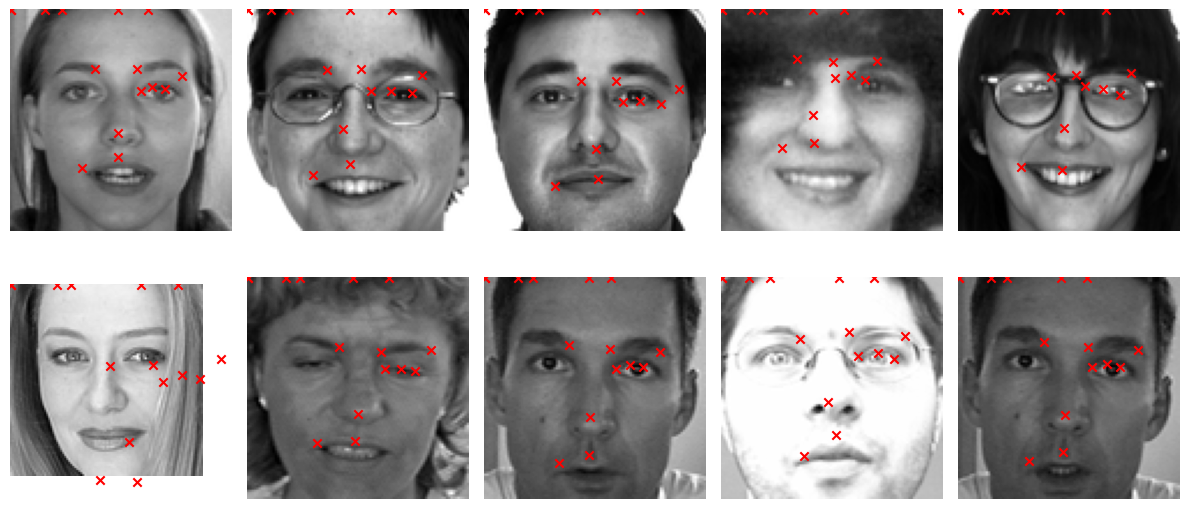

In [175]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [110]:
def custom_loss(y_true, y_pred) :
    return l2_loss(y_true, y_pred) + 0.5*cosine_loss(y_true, y_pred)

In [111]:
model = tf.keras.Sequential()

# Conv layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
# Max pooling layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2, ))
# Dropout layer 1
#model.add(layers.Dropout(0.25))

# Conv layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Max pooling layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 2
#model.add(layers.Dropout(0.25))

# Conv layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 3
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 3
#model.add(layers.Dropout(0.25))

# Conv layer 4
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Max pooling layer 4
model.add(layers.MaxPooling2D((2, 2), strides=2))
# Dropout layer 4
#model.add(layers.Dropout(0.25))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(64, activation='relu'))
# Dropout layer 5

# Output layer
model.add(layers.Dense(units=30, activation='relu'))

model.compile(optimizer='adam', loss=custom_loss)

history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))



Epoch 1/100
41/41 [==============================] - 5s 110ms/step - loss: 1192.0262 - val_loss: 959.8312
Epoch 2/100
41/41 [==============================] - 4s 105ms/step - loss: 966.4225 - val_loss: 958.4089
Epoch 3/100
41/41 [==============================] - 4s 105ms/step - loss: 955.6898 - val_loss: 975.1088
Epoch 4/100
41/41 [==============================] - 4s 107ms/step - loss: 950.3307 - val_loss: 938.3055
Epoch 5/100
41/41 [==============================] - 4s 106ms/step - loss: 945.5197 - val_loss: 973.0535
Epoch 6/100
41/41 [==============================] - 4s 106ms/step - loss: 938.9122 - val_loss: 936.1549
Epoch 7/100
41/41 [==============================] - 4s 102ms/step - loss: 928.8578 - val_loss: 925.4968
Epoch 8/100
41/41 [==============================] - 4s 102ms/step - loss: 923.1766 - val_loss: 922.1569
Epoch 9/100
41/41 [==============================] - 4s 102ms/step - loss: 921.7386 - val_loss: 935.1628
Epoch 10/100
41/41 [==============================] - 

41/41 [==============================] - 4s 106ms/step - loss: 855.5494 - val_loss: 877.8132
Epoch 79/100
41/41 [==============================] - 4s 106ms/step - loss: 855.4584 - val_loss: 877.1979
Epoch 80/100
41/41 [==============================] - 4s 104ms/step - loss: 855.3732 - val_loss: 878.7910
Epoch 81/100
41/41 [==============================] - 4s 107ms/step - loss: 855.9550 - val_loss: 880.9595
Epoch 82/100
41/41 [==============================] - 4s 106ms/step - loss: 764.1538 - val_loss: 761.4492
Epoch 83/100
41/41 [==============================] - 4s 104ms/step - loss: 730.8497 - val_loss: 749.0837
Epoch 84/100
41/41 [==============================] - 4s 105ms/step - loss: 725.5701 - val_loss: 760.1407
Epoch 85/100
41/41 [==============================] - 4s 106ms/step - loss: 725.7584 - val_loss: 742.9382
Epoch 86/100
41/41 [==============================] - 4s 105ms/step - loss: 722.8302 - val_loss: 749.8419
Epoch 87/100
41/41 [==============================] - 4s 10

In [114]:
predictions = model.predict(X_val)
#predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 21ms/step


array([[ 0.      , 33.155273, 25.836071, ...,  0.      , 45.40504 ,
        77.054245],
       [ 0.      , 46.917053, 32.5444  , ...,  0.      , 52.045643,
        99.410194],
       [ 0.      , 32.59084 , 26.285816, ...,  0.      , 42.18751 ,
        70.68808 ],
       ...,
       [ 0.      , 37.142277, 27.804876, ...,  0.      , 43.508884,
        87.47846 ],
       [ 0.      , 38.87529 , 26.589924, ...,  0.      , 44.880127,
        79.47703 ],
       [ 0.      , 27.29491 , 24.265646, ...,  0.      , 46.115334,
        66.20732 ]], dtype=float32)

In [115]:
custom_loss(y_val, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=1157.4265>

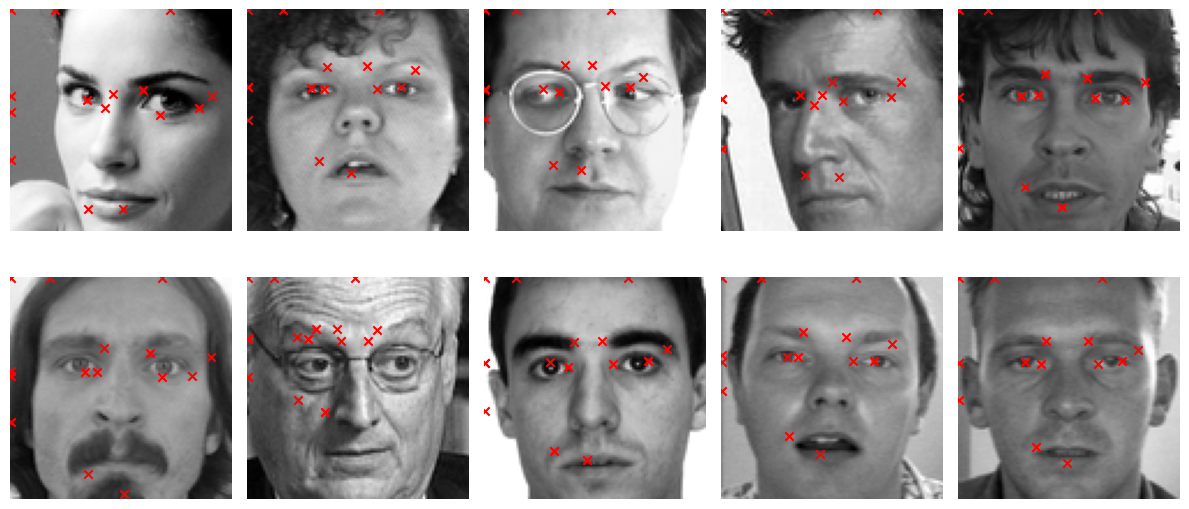

In [113]:
np.random.seed(88)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_val))
    img = X_val[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [167]:
predictions = model.predict(X_test)
predictions = np.reshape(predictions, (predictions.shape[0], 15, 2))
predictions

14/14 [==============================] - 0s 20ms/step


array([[[66.58011 , 36.588478],
        [ 0.      , 36.97129 ],
        [58.259914, 39.65134 ],
        ...,
        [27.395243, 70.95442 ],
        [48.925484, 74.61607 ],
        [49.04607 , 84.06086 ]],

       [[71.715805, 40.212887],
        [ 0.      , 41.378273],
        [64.86575 , 42.29026 ],
        ...,
        [37.830982, 83.65881 ],
        [52.049232, 81.694214],
        [52.22201 , 91.07221 ]],

       [[67.74398 , 35.320408],
        [ 0.      , 36.869396],
        [60.90815 , 38.10616 ],
        ...,
        [31.460514, 77.14258 ],
        [48.523384, 70.94218 ],
        [51.053947, 86.0572  ]],

       ...,

       [[68.04759 , 35.443825],
        [ 0.      , 37.04116 ],
        [61.91001 , 38.870323],
        ...,
        [36.79631 , 76.99776 ],
        [50.3953  , 68.03052 ],
        [50.17277 , 84.584076]],

       [[64.1072  , 36.852276],
        [ 0.      , 37.451714],
        [59.15612 , 37.898495],
        ...,
        [30.103336, 70.60718 ],
        [45.86283 

In [166]:
custom_loss(y_test, np.expand_dims(predictions, axis = 1))

<tf.Tensor: shape=(), dtype=float32, numpy=1103.1997>

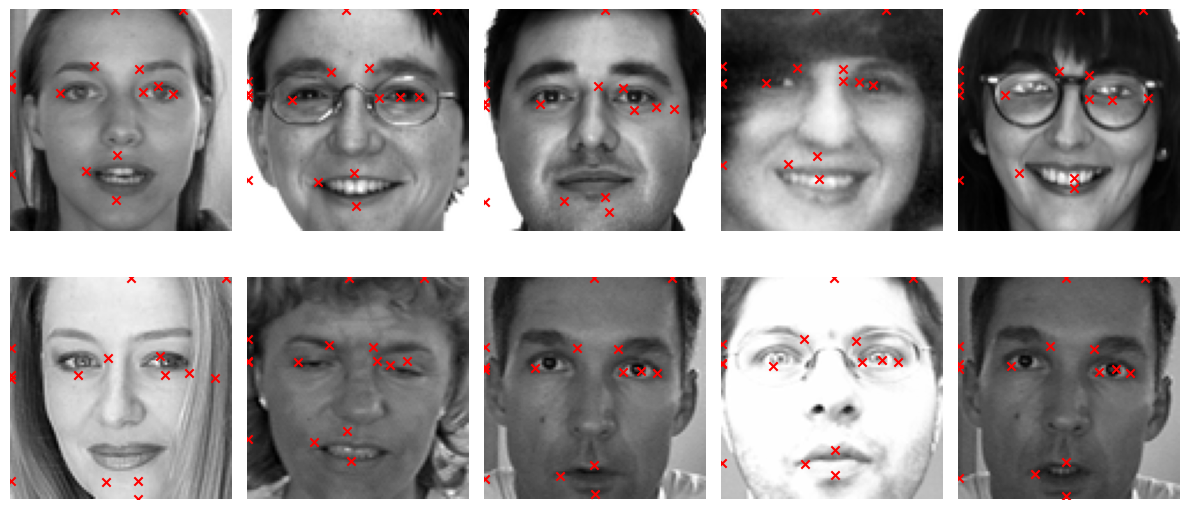

In [168]:
np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X_test))
    img = X_test[index]
    keypoints = predictions[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()